# Advanced Image Classification with ImageNet

In this assignment, you will be asked to develop a convolutional neural network (CNN) to classify images from the CIFAR-100 dataset. At each step, you'll be guided through the process of developing a model architecture to solve a problem. Your goal is to create a CNN that attains at least 55% accuracy on the validation set.

### The CIFAR-100 Dataset

The [CIFAR-100 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) consists of 60000 32x32 colour images in 100 classes, with 600 images per class. There are 50000 training images and 10000 test images. The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 500 images from each class.

### Tools

You will use Keras with TensorFlow to develop your CNN. For this assignment, it's strongly recommended that you use a GPU to accelerate your training, or else you might find it difficult to train your network in a reasonable amount of time. If you have a computer with a GPU that you wish to use, you can follow the [TensorFlow instructions](https://www.tensorflow.org/install/) for installing TensorFlow with GPU support. Otherwise, you can use [Google Colab](https://colab.research.google.com/) to complete this assignment. Colab provides free access to GPU-enabled machines. If you run into any issues, please contact us as soon as possible so that we can help you resolve them.

## Task 1: Data Exploration and Preprocessing (Complete or Incomplete)
### 1a: Load and Explore the Dataset
- Use the code below to download the dataset.
- Explore the dataset: examine the shape of the training and test sets, the dimensions of the images, and the number of classes. Show a few examples from the training set.

In [1]:
from keras.datasets import cifar100

# Load the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [2]:
class_names = [
    "apple", "aquarium_fish", "baby", "bear", "beaver", "bed", "bee", "beetle", "bicycle", "bottle",
    "bowl", "boy", "bridge", "bus", "butterfly", "camel", "can", "castle", "caterpillar", "cattle",
    "chair", "chimpanzee", "clock", "cloud", "cockroach", "couch", "crab", "crocodile", "cup", "dinosaur",
    "dolphin", "elephant", "flatfish", "forest", "fox", "girl", "hamster", "house", "kangaroo", "keyboard",
    "lamp", "lawn_mower", "leopard", "lion", "lizard", "lobster", "man", "maple_tree", "motorcycle", "mountain",
    "mouse", "mushroom", "oak_tree", "orange", "orchid", "otter", "palm_tree", "pear", "pickup_truck", "pine_tree",
    "plain", "plate", "poppy", "porcupine", "possum", "rabbit", "raccoon", "ray", "road", "rocket",
    "rose", "sea", "seal", "shark", "shrew", "skunk", "skyscraper", "snail", "snake", "spider",
    "squirrel", "streetcar", "sunflower", "sweet_pepper", "table", "tank", "telephone", "television", "tiger", "tractor",
    "train", "trout", "tulip", "turtle", "wardrobe", "whale", "willow_tree", "wolf", "woman", "worm"
]

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)
Height of images: 32
Width of images: 32
RGB of images: 3
Number of classes: 100


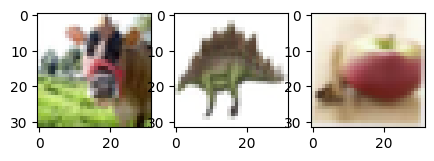

In [3]:
import matplotlib.pyplot as plt

# shape of the training and test sets
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

# dimentions of images
height_of_images = x_train.shape[1]
print(f"Height of images: {height_of_images}")
width_of_images = x_train.shape[2]
print(f"Width of images: {width_of_images}")
RGB_of_images = x_train.shape[3]
print(f"RGB of images: {RGB_of_images}")

# the number of classes
number_of_classes = len(set(y_train.flatten()))
print(f"Number of classes: {number_of_classes}")

# a few examples from the training set
plt.figure(figsize=(5, 5))

for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.imshow(x_train[i])

plt.show()

### 1b: Data Preprocessing
- With the data downloaded, it's time to preprocess it. Start by normalizing the images so that they all have pixel values in the range [0, 1].
- Next, convert the labels to one-hot encoded vectors.
- Finally, split the training set into training and validation sets. Use 80% of the training set for training and the remaining 20% for validation.

In [4]:
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# normalizing pixel value in the range [0,1]
x_train = x_train/255
x_test = x_test/255

# one-hot encoding the labels
y_train = to_categorical(y_train, num_classes=100)
y_test = to_categorical(y_test, num_classes=100)

# split the training set
x_train, x_validation, y_train, y_validation = train_test_split(x_train, y_train, test_size=0.2, random_state=123)

In [5]:
# verifying test/train/validation shapes
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_validation shape: {x_validation.shape}")
print(f"y_validation shape: {y_validation.shape}")
print(f"Shape of test set: {x_test.shape}, {y_test.shape}")

x_train shape: (40000, 32, 32, 3)
y_train shape: (40000, 100)
x_validation shape: (10000, 32, 32, 3)
y_validation shape: (10000, 100)
Shape of test set: (10000, 32, 32, 3), (10000, 100)


## Task 2: Model Development (Complete or Incomplete)
### Task 2a: Create a Baseline CNN Model
- Design a CNN architecture. Your architecture should use convolutional layers, max pooling layers, and dense layers. You can use any number of layers, and you can experiment with different numbers of filters, filter sizes, strides, padding, etc. The design doesn't need to be perfect, but it should be unique to you.
- Print out the model summary.

In [50]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

model = Sequential()

# first block
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# second block
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))  # Dropout to prevent overfitting

# output layer
model.add(Dense(100, activation='softmax'))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_25 (Conv2D)                   │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_24 (MaxPooling2D)      │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_25 (MaxPooling2D)      │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 512)                 │       2,097,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 100)                 │          51,300 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,168,356 (8.27 MB)

 Trainable params: 2,168,356 (8.27 MB)

 Non-trainable params: 0 (0.00 B)

### Task 2b: Compile the model

- Select an appropriate loss function and optimizer for your model. These can be ones we have looked at already, or they can be different.
- Briefly explain your choices (one or two sentences each).
- <b>Loss function:</b> Categorical crossentropy. Since the problem is a multiclass classification problem with 100 classes and the class labels are in one-hot encoded form, Categorical Crossentropy can be an appropriate loss function.
- <b>Optimizer:</b> Adaptive Moment Estimation. This is widely used for image classification and it doesn't need to manually tune the learning rate. It is also efficient and requires low memory.

In [51]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
#Loss function: Categorical crossentropy. Since the problem is a multiclass classification problem with 100 classes and the class labels are in one-hot encoded form, Categorical Crossentropy can be an appropriate loss function.
#Optimizer: Adaptive Moment Estimation. This is widely used for image classification and it doesn't need to manually tune the learning rate. It is also efficient and requires low memory.

## Task 3: Model Training and Evaluation (Complete or Incomplete)
### Task 3a: Train the Model

- Train your model for an appropriate number of epochs. Explain your choice of the number of epochs used - you can change this number before submitting your assignment. ---I started by 10 epochs. Considering the accuracy and loss results it seems that 7 is the optimal.
- Use a batch size of 32.
- Use the validation set for validation.

In [52]:
# Train the model
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss',
                               patience=3,
                               restore_best_weights=True)

history = model.fit(x_train, y_train,
                    epochs=7,
                    batch_size=32,
                    validation_data=(x_validation, y_validation),
                    callbacks=[early_stopping])
#I started by 10 epochs. Considering the accuracy and loss results it seems that 7 is the optimal.

Epoch 1/7
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 111s 87ms/step - accuracy: 0.0667 - loss: 4.1762 - val_accuracy: 0.2199 - val_loss: 3.2563
Epoch 2/7
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 141s 86ms/step - accuracy: 0.2157 - loss: 3.2397 - val_accuracy: 0.3019 - val_loss: 2.8243
Epoch 3/7
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 140s 85ms/step - accuracy: 0.2901 - loss: 2.8555 - val_accuracy: 0.3307 - val_loss: 2.6746
Epoch 4/7
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 142s 85ms/step - accuracy: 0.3321 - loss: 2.6180 - val_accuracy: 0.3583 - val_loss: 2.5547
Epoch 5/7
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 143s 86ms/step - accuracy: 0.3731 - loss: 2.4192 - val_accuracy: 0.3708 - val_loss: 2.4944
Epoch 6/7
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 137s 82ms/step - accuracy: 0.4096 - loss: 2.2376 - val_accuracy: 0.3812 - val_loss: 2.4710
Epoch 7/7
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 104s 83ms/step - accuracy: 0.4422 - loss: 2.0954 - val_accuracy: 0.3782 - val_loss: 2.4619


### Task 3b: Accuracy and other relevant metrics on the test set

- Report the accuracy of your model on the test set.
- While accuracy is a good metric, there are many other ways to numerically evaluate a model. Report at least one other metric, and explain what it measures and how it is calculated.

- <b>Accuracy:</b> ______
- <b>Other metric:</b> F1 Score(weighted)
- <b>Reason for selection:</b> Because it provides a balance between precision and recall. It is also useful when the data is imbalanced. With 100 classes, some might be harder to predict than others, and accuracy alone doesn’t reveal class-specific performance. The weighted F1 Score accounts for precision and recall across all classes, weighted by the number of samples per class, making it suitable for this multi-class problems.
- <b>Value of metric:</b> we can consider 0.55 for our model.
- <b>Interpretation of metric value:</b> a F1-Score of 0.55 shows an average performance in terms of balancing precision and recall.

In [53]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test Loss:     {test_loss}')
print(f'Test Accuracy: {test_accuracy*100}%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.3834 - loss: 2.4490
Test Loss:     2.4556632041931152
Test Accuracy: 38.029998540878296%


In [54]:
import numpy as np
from sklearn.metrics import f1_score

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)
f1 = f1_score(y_test_classes, y_pred_classes, average='weighted')
print(f"Weighted F1 Score: {f1}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step
Weighted F1 Score: 0.375342047621848


### Task 3c: Visualize the model's learning

- Plot the training accuracy and validation accuracy with respect to epochs.
- Select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.
- Briefly discuss the results. What do the plots show? Do the results make sense? What do the classification probabilities indicate?------Since both training and validation accuracy are increasing steadily, it suggests that the model is learning and generalizing well to unseen data but from epoch 3 it seems there is overfitting. Yes, the results make sense. The results show that the model is doing a good job of learning and adapting, as both the training and validation accuracy are steadily improving. When it correctly identified "sea," the model was highly confident with a probability of 0.9263, which shows it made a reliable decision. However, in the case of the incorrect classification (bridge vs. mountain), the model predicted "bridge" with a probability of 0.4434, the highest for any category, while the true class was "mountain" at just 0.0287. This suggests the model wasn’t entirely sure, as the probabilities for both "bridge" and "mountain" were fairly close, leading to the wrong prediction. The classification probabilities give insight into how confident the model was in its decisions and highlight areas where it struggled.

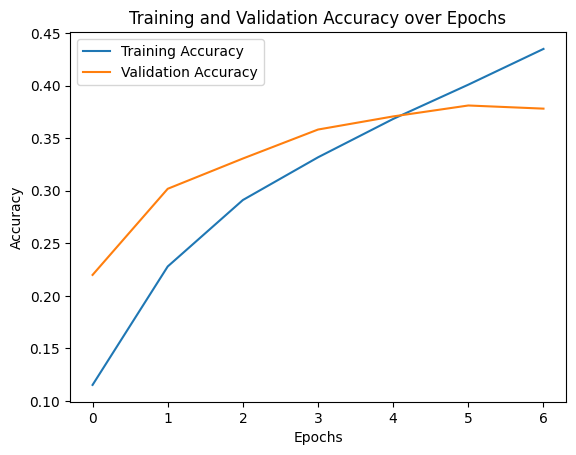

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step


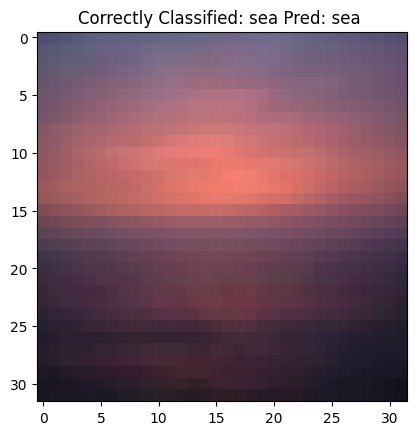

Correct Image Classification Probabilities: [2.59705266e-04 1.08939952e-04 9.76970114e-07 4.91074061e-08
 3.69113806e-08 3.19824103e-05 1.00110954e-10 4.27962306e-08
 1.02563680e-09 2.85724286e-06 1.01207334e-04 4.66135049e-07
 1.20598520e-06 1.67362462e-08 1.83499242e-08 5.21530228e-06
 8.45439047e-07 8.02250668e-07 6.62960520e-06 1.02266529e-06
 2.09765653e-06 1.69394207e-10 3.15194058e-07 2.10786723e-02
 1.46557326e-07 1.89477141e-04 6.00892406e-07 1.93788683e-08
 4.05834580e-05 1.49819996e-08 6.54021193e-08 1.32709687e-07
 2.97127781e-06 4.44966099e-05 4.30358426e-07 6.53662990e-09
 2.25368717e-06 5.19459711e-08 5.29921129e-09 5.19533614e-06
 1.86393925e-04 3.57956651e-08 2.41248777e-09 5.68378189e-09
 1.04180583e-06 2.11499085e-07 3.40404540e-07 2.63853901e-04
 6.50322088e-11 2.59039016e-03 5.69369192e-08 1.88429090e-06
 1.78545478e-09 2.96029793e-06 3.93105365e-05 6.45207194e-07
 1.32116938e-07 3.87947221e-05 2.96367890e-08 1.21504229e-07
 4.78249080e-02 7.39213647e-06 5.22007140

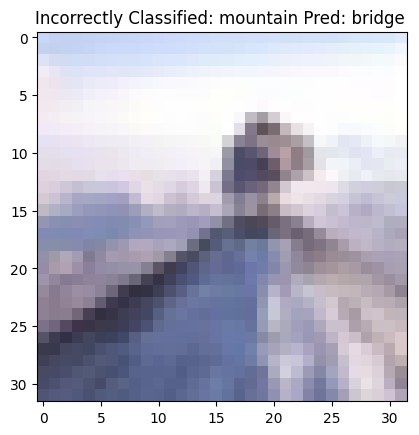

Incorrect Image Classification Probabilities: [1.57019929e-06 6.63780957e-05 6.81738427e-04 1.44153717e-03
 2.98208441e-04 3.48406669e-04 8.68969437e-05 1.95775158e-03
 2.63159000e-03 2.18046457e-03 1.00625293e-04 1.89434458e-03
 4.44337368e-01 1.98893147e-04 5.06449833e-05 6.92292640e-04
 1.62924465e-04 1.05383783e-03 1.11834202e-02 3.93821596e-04
 1.63741861e-04 1.89398153e-04 2.21286784e-04 1.34710353e-02
 3.93657130e-04 5.30244899e-04 2.55055260e-04 1.93396152e-03
 8.91326636e-05 3.51899420e-04 2.42006611e-02 3.87773063e-04
 1.39318220e-03 1.37647579e-03 1.80515082e-04 1.32629136e-03
 2.87223265e-05 4.57022106e-03 1.18568633e-03 4.75500943e-03
 9.43041127e-03 4.65537887e-04 4.49629915e-05 1.13016849e-05
 4.55381488e-03 1.79335580e-03 7.42289284e-03 1.17983218e-04
 3.40343977e-04 1.94185823e-02 6.97691052e-04 2.11016537e-04
 9.60141642e-06 1.08067503e-07 9.15584853e-04 3.23800230e-03
 2.82274671e-02 1.58069786e-04 6.53421448e-04 8.78965762e-03
 5.83309156e-04 4.12200861e-05 2.106428

In [55]:
import numpy as np
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy over Epochs')
plt.show()

y_pred = model.predict(x_test)

correct_indices = []
incorrect_indices = []

for i in range(len(y_pred)):
    if np.argmax(y_pred[i]) == np.argmax(y_test[i]):  # Correct prediction
        correct_indices.append(i)
    else:  # Incorrect prediction
        incorrect_indices.append(i)

correct_idx = correct_indices[0]
incorrect_idx = incorrect_indices[0]

plt.imshow(x_test[correct_idx])
plt.title(f"Correctly Classified: {class_names[np.argmax(y_test[correct_idx])]} Pred: {class_names[np.argmax(y_pred[correct_idx])]} ")
plt.show()

correct_probabilities = y_pred[correct_idx]
print(f"Correct Image Classification Probabilities: {correct_probabilities}")
print(f"Predicted Class: {class_names[np.argmax(correct_probabilities)]}, True Class: {class_names[np.argmax(y_test[correct_idx])]}")

plt.imshow(x_test[incorrect_idx])
plt.title(f"Incorrectly Classified: {class_names[np.argmax(y_test[incorrect_idx])]} Pred: {class_names[np.argmax(y_pred[incorrect_idx])]} ")
plt.show()

incorrect_probabilities = y_pred[incorrect_idx]
print(f"Incorrect Image Classification Probabilities: {incorrect_probabilities}")
print(f"Predicted Class: {class_names[np.argmax(incorrect_probabilities)]}, True Class: {class_names[np.argmax(y_test[incorrect_idx])]}")

## Task 4: Model Enhancement (Complete or Incomplete)
### Task 4a: Implementation of at least one advanced technique

- Now it's time to improve your model. Implement at least one technique to improve your model's performance. You can use any of the techniques we have covered in class, or you can use a technique that we haven't covered. If you need inspiration, you can refer to the [Keras documentation](https://keras.io/).
- Explain the technique you used and why you chose it.----I implemented data augmentation to improve my model's performance. It artificially increases the size and diversity of the training dataset by applying random transformations to the original images. I chose that technique as it is recognized for image classification which is effective in cases with limited dataset sizes.
- If you used a technique that requires tuning, explain how you selected the values for the hyperparameters. ------The hyperparameters were chosen as moderate defaults that introduce useful variation without risking excessive distortion.

In [56]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define an ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.2
)

# Fit the data generator on the training data
datagen.fit(x_train)

# Train the model with augmented data
history_aug = model.fit(datagen.flow(x_train, y_train, batch_size=32), epochs=7, validation_data=(x_validation, y_validation))

Epoch 1/7


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 130s 102ms/step - accuracy: 0.2803 - loss: 2.9152 - val_accuracy: 0.3761 - val_loss: 2.4706
Epoch 2/7
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 131s 105ms/step - accuracy: 0.2928 - loss: 2.8311 - val_accuracy: 0.3798 - val_loss: 2.4659
Epoch 3/7
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 123s 98ms/step - accuracy: 0.3096 - loss: 2.7547 - val_accuracy: 0.3793 - val_loss: 2.4526
Epoch 4/7
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 124s 99ms/step - accuracy: 0.3087 - loss: 2.7201 - val_accuracy: 0.3715 - val_loss: 2.4477
Epoch 5/7
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 142s 99ms/step - accuracy: 0.3167 - loss: 2.6858 - val_accuracy: 0.3934 - val_loss: 2.3752
Epoch 6/7
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 122s 98ms/step - accuracy: 0.3275 - loss: 2.6565 - val_accuracy: 0.3878 - val_loss: 2.3981
Epoch 7/7
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 127s 101ms/step - accuracy: 0.3304 - loss: 2.6364 - val_accuracy: 0.4025 - val_loss: 2.3306


### Task 4b: Evaluation of the enhanced model

- Re-train your model using the same number of epochs as before.
- Compare the accuracy and other selected metric on the test set to the results you obtained before.
- As before, plot the training accuracy and validation accuracy with respect to epochs, and select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.

In [57]:
test_loss_aug, test_acc_aug = model.evaluate(x_test, y_test)

print(f'Enhanced Test Loss:     {test_loss}')
print(f'Enhanced Test Accuracy: {test_accuracy*100}%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.4034 - loss: 2.3157
Enhanced Test Loss:     2.4556632041931152
Enhanced Test Accuracy: 38.029998540878296%


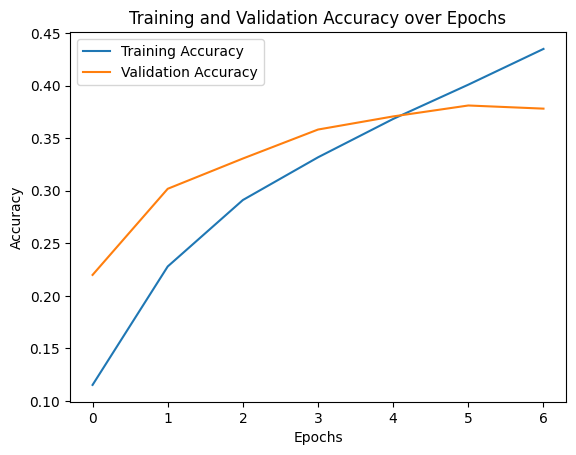

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step


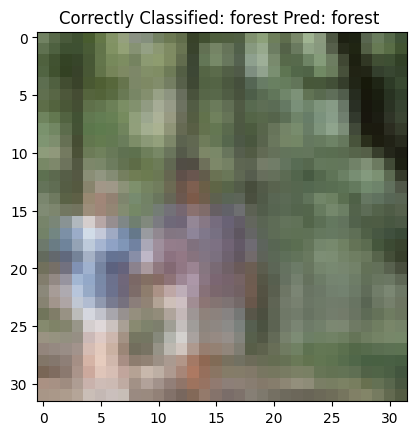

Correct Image Classification Probabilities: [1.3646907e-06 8.2171633e-04 1.2524994e-04 8.2305195e-03 5.5431668e-03
 1.8840241e-04 4.4976705e-04 8.6476619e-04 2.7868446e-02 2.7924700e-04
 7.0628477e-05 1.6617205e-04 5.2914810e-03 4.2083149e-04 3.8684125e-04
 6.4245956e-03 5.7670906e-05 2.3435033e-04 2.9848893e-03 3.6500755e-03
 4.2141583e-05 1.7978933e-04 3.2469907e-04 2.1035685e-05 5.9016884e-06
 1.6871614e-03 6.8605260e-04 1.5429032e-02 1.3332144e-05 2.8321382e-02
 2.3485203e-05 1.3383171e-01 1.0224123e-03 3.2010868e-01 7.3263403e-03
 4.7030897e-04 1.8211988e-04 1.1019284e-02 2.2571474e-02 2.9945404e-03
 5.5629225e-05 1.9997970e-04 6.1238214e-02 7.0464419e-04 7.4002906e-03
 6.1766794e-03 2.3997620e-04 2.2549441e-03 3.8910547e-04 6.1943465e-05
 1.3760568e-02 1.7653373e-03 3.2138650e-04 4.5843973e-10 3.5327153e-05
 1.7233361e-03 2.0830635e-02 1.6877125e-04 2.0518765e-04 1.0957795e-02
 4.7063536e-06 8.8128163e-06 7.8845382e-08 3.5439745e-02 6.3933539e-03
 1.4171120e-02 3.4901548e-02 2.08

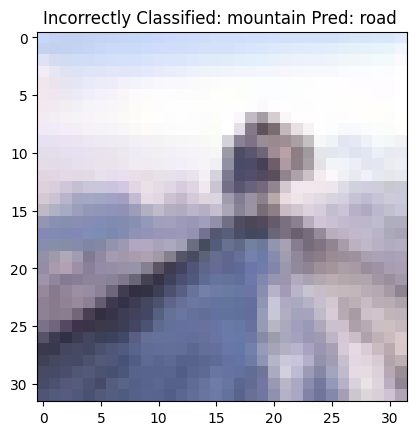

Incorrect Image Classification Probabilities: [3.6337354e-08 2.8387643e-04 1.3169320e-04 1.2914215e-03 9.9396962e-04
 7.6797434e-05 2.4077372e-05 4.6144117e-04 6.5455545e-04 8.1415114e-05
 1.7975530e-05 3.9350145e-04 1.3851362e-01 1.9559490e-04 6.8176159e-06
 1.4745873e-04 1.5588810e-05 3.2110739e-04 4.7970712e-03 1.9672923e-05
 6.7864789e-06 3.1479212e-04 5.4710104e-05 2.0045476e-02 1.8785815e-04
 1.7368059e-04 2.9821834e-04 4.5736404e-03 9.5444513e-05 8.8651381e-05
 1.2243580e-01 8.9330577e-05 1.4421770e-03 1.0743454e-03 8.2849838e-06
 8.0773672e-05 4.5040979e-06 2.0765704e-03 3.3808502e-04 2.5990522e-03
 2.7225560e-03 7.2125389e-05 2.0311641e-05 2.1833823e-06 3.5624728e-03
 7.0671260e-04 1.5389338e-03 1.4599048e-06 1.0976538e-04 1.4830889e-01
 3.6532898e-04 1.5364350e-05 2.1834906e-06 9.6045255e-12 1.0410391e-04
 1.7454671e-02 2.4137769e-03 6.6247007e-06 1.5504635e-04 3.6712138e-03
 7.6795528e-05 3.4458058e-06 1.5831754e-06 1.7232907e-05 3.1193148e-04
 6.0255174e-04 1.6665943e-04 2.

In [58]:
import numpy as np
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy over Epochs')
plt.show()

y_pred = model.predict(x_test)

correct_indices = []
incorrect_indices = []

for i in range(len(y_pred)):
    if np.argmax(y_pred[i]) == np.argmax(y_test[i]):  # Correct prediction
        correct_indices.append(i)
    else:  # Incorrect prediction
        incorrect_indices.append(i)

correct_idx = correct_indices[0]
incorrect_idx = incorrect_indices[0]

plt.imshow(x_test[correct_idx])
plt.title(f"Correctly Classified: {class_names[np.argmax(y_test[correct_idx])]} Pred: {class_names[np.argmax(y_pred[correct_idx])]} ")
plt.show()

correct_probabilities = y_pred[correct_idx]
print(f"Correct Image Classification Probabilities: {correct_probabilities}")
print(f"Predicted Class: {class_names[np.argmax(correct_probabilities)]}, True Class: {class_names[np.argmax(y_test[correct_idx])]}")

plt.imshow(x_test[incorrect_idx])
plt.title(f"Incorrectly Classified: {class_names[np.argmax(y_test[incorrect_idx])]} Pred: {class_names[np.argmax(y_pred[incorrect_idx])]} ")
plt.show()

incorrect_probabilities = y_pred[incorrect_idx]
print(f"Incorrect Image Classification Probabilities: {incorrect_probabilities}")
print(f"Predicted Class: {class_names[np.argmax(incorrect_probabilities)]}, True Class: {class_names[np.argmax(y_test[incorrect_idx])]}")

### Task 4c: Discussion of the results

- Briefly discuss the results.
- Did the model's performance improve?
- Why do you think this is?
- Do you think there is room for further improvement? Why or why not?
- What other techniques might you try in the future?
- Your answer should be no more than 200 words.

# The model's performance did not change that much and isstill with accuracy=38.03%.There is still room for further improvement, especially with the addition of more convolutional layers and batch normalization to capture more features and stabilize training. Future improvements could include learning rate scheduling, early stopping, or using transfer learning to leverage pre-trained models and boost accuracy.

## Criteria

|Criteria|Complete|Incomplete|
|----|----|----|
|Task 1|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 2|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 3|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 4|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.